Linear regression tutorial
===
-yay
Linear regression is similar to a line of best fit. However, instead of focusing on drawing a line that touches the most points, you want a line that sit most evenly between all points.



In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

In [2]:
Image(url='http://www.sthda.com/english/sthda-upload/images/machine-learning-essentials/linear-regression.png')

### First we are going to create some random points based of a cos function

/home/me/.local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


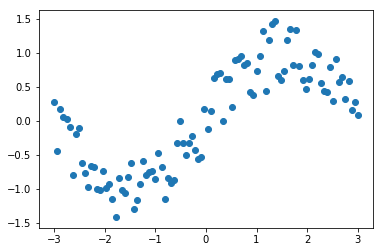

In [3]:

plt.ion()
num_points = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, num_points)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, num_points)
ax.scatter(xs, ys)
fig.show()
plt.draw()

Next we create placeholders for our input and output
===

In [4]:
input_data = tf.placeholder(tf.float32)
output_data = tf.placeholder(tf.float32)

### Create the variables for weights and biases


In [5]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.multiply(input_data, W), b)

### We use mean squared error here just as before in our prior example.


In [6]:
loss = tf.reduce_sum(tf.pow(Y_pred - output_data, 2)) / (num_points - 1)

Optimize Using Gradient Descent
===

In [7]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

Create the Tensorflow session
===

In [8]:
n_epochs = 1000
with tf.Session() as sess:
    #initalize all variable
    sess.run(tf.global_variables_initializer())

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={input_data: x, output_data: y})

        training_cost = sess.run(
            loss, feed_dict={input_data: xs, output_data: ys})
        print(training_cost)

        if epoch_i % 20 == 0:
            ax.plot(xs, Y_pred.eval(
                feed_dict={input_data: xs}, session=sess),
                    'k', alpha=epoch_i / n_epochs)
            fig.show()
            plt.draw()

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
fig.show()

1.36706
1.25144
1.14882
1.05771
0.976788


/home/me/.local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.904879
0.840952
0.784092
0.733491
0.688434
0.64829
0.612498
0.580566
0.552056
0.526581
0.503798
0.483406
0.465135
0.448749
0.434038
0.420815
0.408917
0.398198
0.388528
0.379794
0.371893
0.364736
0.358243
0.352344
0.346976
0.342083
0.337616
0.33353
0.329788
0.326354
0.323197
0.32029
0.317609
0.315131
0.312838
0.310712
0.308737
0.3069
0.305189
0.303591
0.302098
0.300701
0.299391
0.298161
0.297005
0.295917
0.294892
0.293925
0.293011
0.292148
0.29133
0.290556
0.289821
0.289124
0.288463
0.287834
0.287235
0.286666
0.286124
0.285607
0.285114
0.284645
0.284196
0.283768
0.28336
0.282969
0.282596
0.282239
0.281898
0.281571
0.281259
0.28096
0.280674
0.2804
0.280138
0.279887
0.279647
0.279416
0.279195
0.278984
0.278781
0.278587
0.278401
0.278222
0.278051
0.277887
0.27773
0.27758
0.277435
0.277297
0.277164
0.277037
0.276915
0.276798
0.276685
0.276578
0.276475
0.276376
0.276281
0.27619
0.276103
0.276019
0.275939
0.275862
0.275788
0.275718
0.27565
0.275585
0.275523
0.275463
0.275406
0.275351
0.2752